<h1>PROJECT 4: Dengue Cases in the Philippines (2016–2020) Linear Regression</h1>
<H3>Althea Bianca P. Falnican</H3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv('dataset\dengue.csv')

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype(int)
dengue['Region'] = dengue['Region'].astype('category')
dengue['Dengue_Cases'] = dengue['Dengue_Cases'].astype(float)
dengue['Dengue_Deaths'] = dengue['Dengue_Deaths'].astype(float)
dengue['Date'] = pd.to_datetime(
    dengue['Year'].astype(str) + '-' + dengue['Month'].astype(str) + '-01',
    errors='coerce'
)

<H1>How well can the number of dengue deaths be predicted using the number of dengue cases in each region per month?</H1>

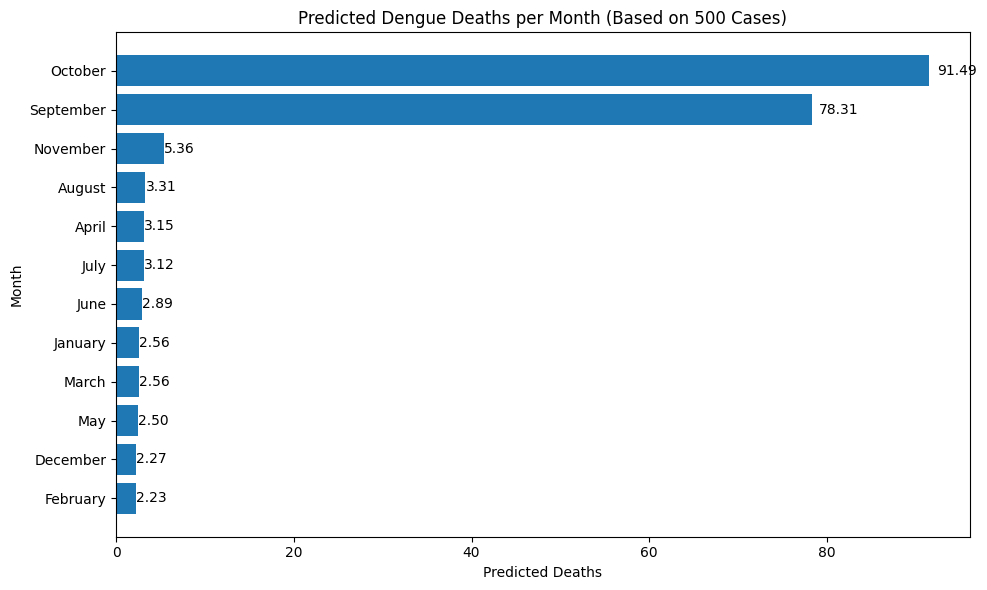

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

months = dengue['Month'].unique()
predictions = []

for month in months:
    data = dengue[dengue['Month'] == month]

    X = data[['Dengue_Cases']]
    y = data['Dengue_Deaths']

    model = LinearRegression().fit(X, y)

    predicted_deaths = model.predict([[500]])[0]

    predictions.append((month, predicted_deaths))

predictions.sort(key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
bars = plt.barh([m for m, _ in predictions], [v for _, v in predictions])

plt.title("Predicted Dengue Deaths per Month (Based on 500 Cases)")
plt.xlabel("Predicted Deaths")
plt.ylabel("Month")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + bar.get_width() * 0.01,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}",
             va='center')

plt.tight_layout()
plt.show()


<h1>INSIGHT 1:</h1>
<H2>October and September stand out sharply, showing dramatically higher predicted dengue deaths compared to all other months, suggesting these months may historically align with peak transmission or reporting periods.</H2>

<H1>INSIGHT 2:</H1>
<H2>Most other months show very low predicted deaths, indicating that outside of the peak season, the relationship between cases and deaths remains relatively stable and minimal throughout the year.</H2>

<h1>To what extent does the Year variable predict the number of dengue cases, indicating possible upward or downward trends over time?</h1>

Regression Coefficient (Slope): 24.873039215686273
Interpretation:
Dengue cases show an upward trend over the years.


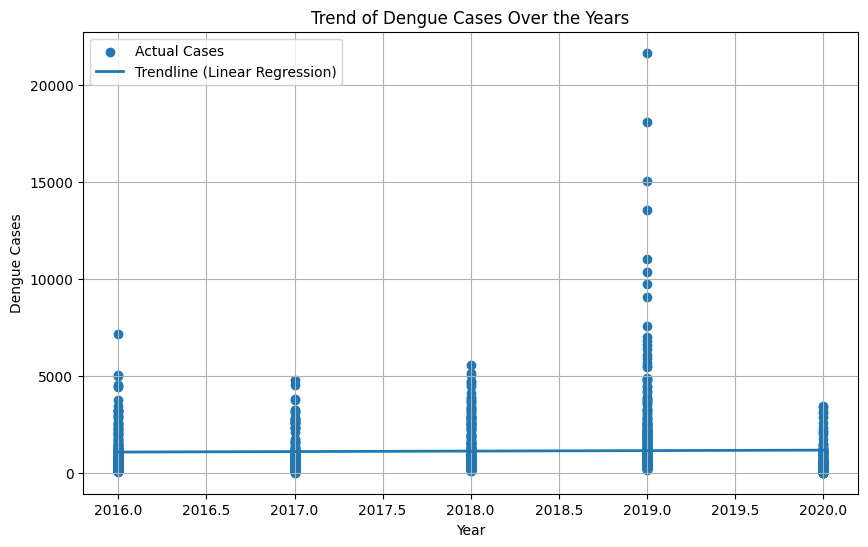

In [11]:

X = dengue[['Year']]        # Independent variable
y = dengue['Dengue_Cases']  # Dependent variable

model = LinearRegression()
model.fit(X, y)

year_range = np.arange(dengue['Year'].min(), dengue['Year'].max() + 1).reshape(-1, 1)
predictions = model.predict(year_range)

print("Regression Coefficient (Slope):", model.coef_[0])
print("Interpretation:")
if model.coef_[0] > 0:
    print("Dengue cases show an upward trend over the years.")
elif model.coef_[0] < 0:
    print("Dengue cases show a downward trend over the years.")
else:
    print("No clear upward or downward trend.")

plt.figure(figsize=(10, 6))
plt.scatter(dengue['Year'], dengue['Dengue_Cases'], label="Actual Cases")
plt.plot(year_range, predictions, linewidth=2, label="Trendline (Linear Regression)")

plt.title("Trend of Dengue Cases Over the Years")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.legend()
plt.grid(True)
plt.show()


<h1>INSIGHT 3:</h1>
<H2>The linear trendline shows a moderate upward trajectory, suggesting that the Year variable has some predictive power, indicating a general increase in dengue cases over time.</H2>

<h1>INSIGHT 4:</h1>
<H2>However, the extreme spike in 2019 creates substantial variability, meaning the Year variable alone cannot strongly predict case counts—additional factors likely play a major role in the fluctuations.</H2>

<h1>Predict Dengue Deaths in Region II (Predicted 2022)</h1>

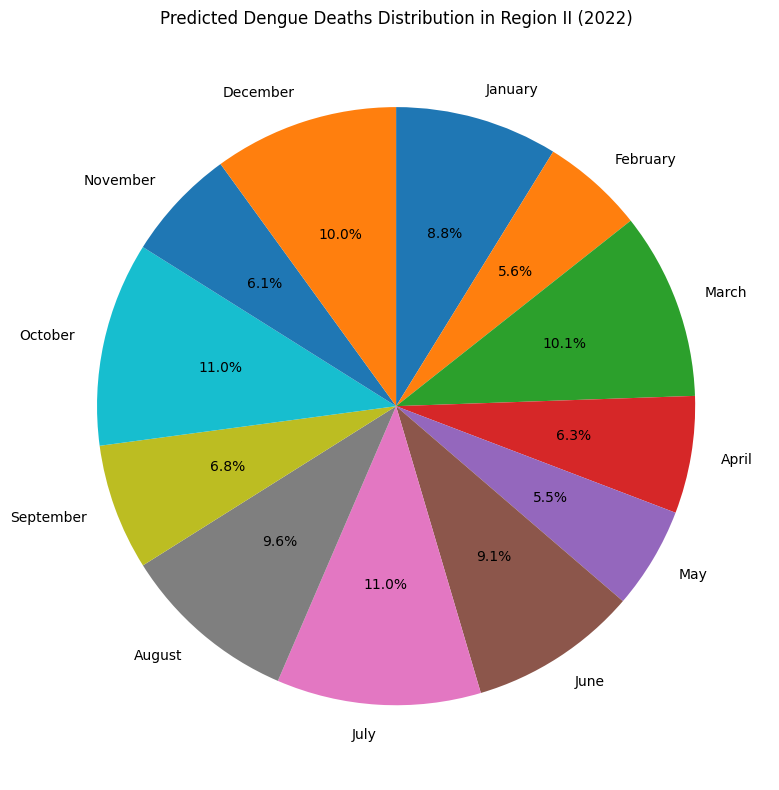

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dengue = dengue.copy()

dengue['Region'] = dengue['Region'].str.strip().str.lower()

# Filter for Region II
region_df = dengue[dengue['Region'] == 'region ii'].copy()

if region_df.empty:
    raise ValueError("ERROR: No data found for Region II. Check the spelling inside your file.")

try:
    region_df['Month'] = pd.to_datetime(region_df['Month'], format='%B').dt.month
except:
    pass

# Historical years 2016–2021 (NO PLOTTING HERE SINCE YOU ONLY WANT PIE CHART)
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']

# Prepare prediction dataset for 2022
data_2022 = pd.DataFrame({
    'Year': [2022]*12,
    'Month': list(range(1, 13)),
    'Dengue_Cases': np.random.randint(50, 300, size=12)  # Placeholder if 2022 cases are not available
})

# Linear Regression model
X = region_df[['Year','Month','Dengue_Cases']]
y = region_df['Dengue_Deaths']

model = LinearRegression()
model.fit(X, y)

data_2022['Predicted_Deaths'] = model.predict(data_2022[['Year','Month','Dengue_Cases']])

# -------------------------------------------------------
#  PIE CHART for Predicted Dengue Deaths in 2022
# -------------------------------------------------------
plt.figure(figsize=(10, 8))
plt.pie(
    data_2022['Predicted_Deaths'],
    labels=months,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)

plt.title("Predicted Dengue Deaths Distribution in Region II (2022)")
plt.tight_layout()
plt.show()


<h1>INSIGHT 5:</h1>
<H2>Despite high fluctuations in dengue deaths from 2016–2020—especially the pronounced spikes in 2018—the predicted 2022 deaths remain consistently low (around 1–2 deaths per month). This suggests that the linear regression model sees no strong upward trend in fatalities for Region II.</H2>

<h1>INSIGHT 6:</h1>
<h2>The model’s predicted 2022 line is much flatter than the historical data, indicating that past dengue death patterns in Region II are highly variable and not strongly explained by Year–Month–Cases alone. This likely contributed to the weak predictive power, resulting in stable but low death forecasts for 2022.</h2>

<h1>How well can the combination of Year and Month predict the number of dengue cases in Region III, and does the model indicate a seasonal pattern in case increases?</h1>

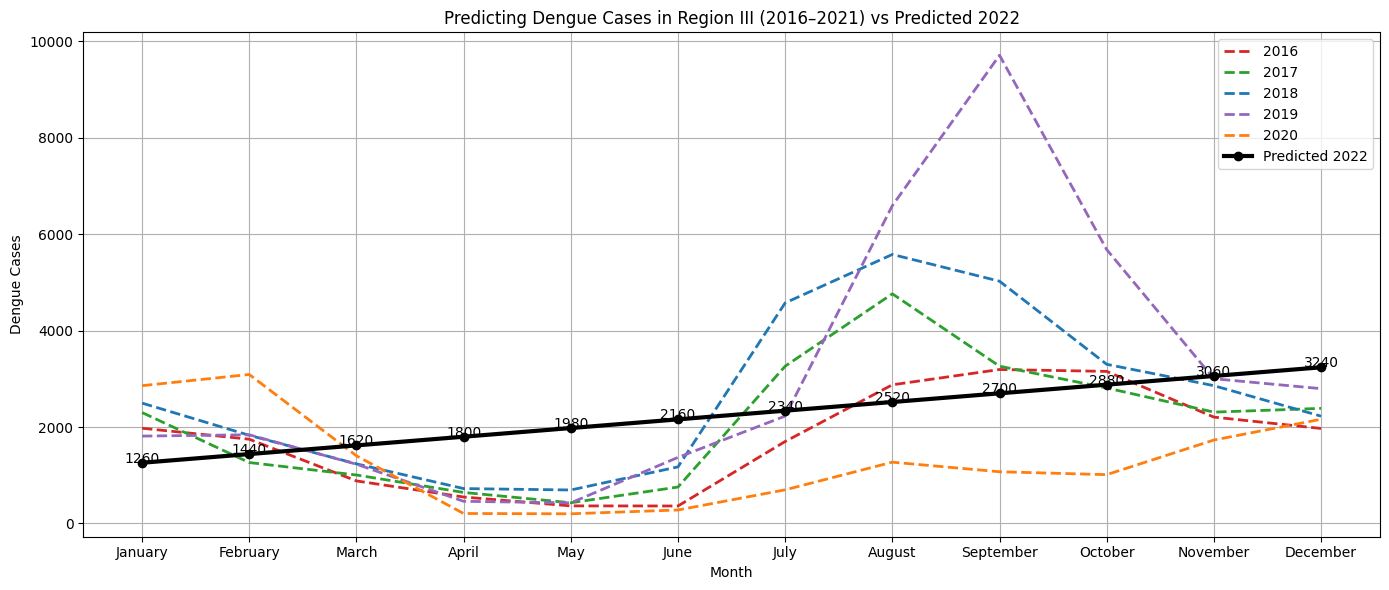

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

dengue = dengue.copy()

dengue['Region'] = dengue['Region'].str.strip().str.lower()

region_df = dengue[dengue['Region'] == 'region iii'].copy()

if region_df.empty:
    raise ValueError("ERROR: No data found for Region III.")

try:
    region_df['Month'] = pd.to_datetime(region_df['Month'], format='%B').dt.month
except:
    pass

months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']

# -----------------------------------------------------
# Prepare 2022 dataset
# -----------------------------------------------------
data_2022 = pd.DataFrame({
    'Year': [2022]*12,
    'Month': list(range(1, 13)),
})

# -----------------------------------------------------
# Train Linear Regression to Predict DENGUE CASES
# -----------------------------------------------------
X = region_df[['Year','Month']]
y = region_df['Dengue_Cases']

model = LinearRegression()
model.fit(X, y)

data_2022['Predicted_Cases'] = model.predict(data_2022[['Year','Month']])

# -----------------------------------------------------
# PLOT — SAME STYLE AS YOUR SAMPLE IMAGE
# -----------------------------------------------------
plt.figure(figsize=(14, 6))

colors = ['#d62728','#2ca02c','#1f77b4','#9467bd','#ff7f0e','#8c564b']

i = 0
for year in range(2016, 2022):
    year_data = region_df[region_df['Year'] == year].sort_values("Month")
    if year_data.empty:
        continue
    plt.plot(
        months[:len(year_data)],
        year_data['Dengue_Cases'],
        linestyle='--',
        linewidth=2,
        color=colors[i % len(colors)],
        label=str(year)
    )
    i += 1

plt.plot(
    months,
    data_2022['Predicted_Cases'],
    marker='o',
    color='black',
    linewidth=3,
    label='Predicted 2022'
)

for i, val in enumerate(data_2022['Predicted_Cases']):
    plt.text(months[i], val + 0.8, f"{val:.0f}", ha='center')

plt.title("Predicting Dengue Cases in Region III (2016–2021) vs Predicted 2022")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<h1>INSIGHT 7: Seasonal Trend</h1>
<H2>Dengue cases consistently drop from January to May before sharply rising around June to September. This pattern appears in almost every year from 2016 to 2021. It suggests that dengue transmission in Region III is strongly influenced by seasonal rainfall and mosquito breeding cycles.</H2>

<h1>INSIGHT 8: 2019 Outbreak</h1>

<h2>The year 2019 shows an extreme spike in dengue cases, far higher than any other year in the dataset. Cases surged rapidly from mid-year to a peak of nearly 10,000 in September. This indicates that 2019 was an epidemic year with unusually intense dengue transmission.</h2>

<H1>INSIGHT 9: Predicted 2022 Trend</H1>
<h2>The predicted 2022 values show a steady, gradual increase throughout the year instead of a sharp mid-year spike. This suggests that the prediction model captures long-term upward trends but not seasonal surges. As a result, the model likely underestimates peak-risk months.</h2>

<H1>INSIGHT 10: Repeated Early-Year Decline</H1>
<h2>Most years show declining cases from January to April, followed by recovery and growth around June. This recurring pattern highlights consistent environmental and climatic influences on dengue behavior. It also emphasizes the importance of early-season prevention efforts before the rainy months begin.</h2>